In [186]:
import pandas as pd
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [187]:
original_df=pd.read_csv('train.csv')
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [188]:
df=original_df.copy()
df.head()

UNIQUEID  DISBURSED_AMOUNT  ASSET_COST    LTV  BRANCH_ID  SUPPLIER_ID  \
0    420825             50578       58400 89.550         67        22807   
1    537409             47145       65550 73.230         67        22807   
2    417566             53278       61360 89.630         67        22807   
3    624493             57513       66113 88.480         67        22807   
4    539055             52378       60300 88.390         67        22807   

   MANUFACTURER_ID  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE  \
0               45                1441    01-01-1984        Salaried   
1               45                1502    31-07-1985   Self employed   
2               45                1497    24-08-1985   Self employed   
3               45                1501    30-12-1993   Self employed   
4               45                1495    09-12-1977   Self employed   

  DISBURSAL_DATE  STATE_ID  EMPLOYEE_CODE_ID  MOBILENO_AVL_FLAG  AADHAR_FLAG  \
0     03-08-2018         6              1998                  1            1   
1     26-09-2018         6              1998                  1            1   
2     01-08-2018         6              1998                  1            1   
3     26-10-2018         6              1998                  1            1   
4     26-09-2018         6              1998                  1            1   

   PAN_FLAG  VOTERID_FLAG  DRIVING_FLAG  PASSPORT_FLAG  PERFORM_CNS_SCORE  \
0         0             0             0              0                  0   
1         0             0             0              0                598   
2         0             0             0              0                  0   
3         0             0             0              0                305   
4         0             0             0              0                  0   

  PERFORM_CNS_SCORE_DESCRIPTION  PRI_NO_OF_ACCTS  PRI_ACTIVE_ACCTS  \
0   No Bureau History Available                0                 0   
1                 I-Medium Risk                1                 1   
2   No Bureau History Available                0                 0   
3              L-Very High Risk                3                 0   
4   No Bureau History Available                0                 0   

   PRI_OVERDUE_ACCTS  PRI_CURRENT_BALANCE  PRI_SANCTIONED_AMOUNT  \
0                  0                    0                      0   
1                  1                27600                  50200   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   PRI_DISBURSED_AMOUNT  SEC_NO_OF_ACCTS  SEC_ACTIVE_ACCTS  SEC_OVERDUE_ACCTS  \
0                     0                0                 0                  0   
1                 50200                0                 0                  0   
2                     0                0                 0                  0   
3                     0                0                 0                  0   
4                     0                0                 0                  0   

   SEC_CURRENT_BALANCE  SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  \
0                    0                      0                     0   
1                    0                      0                     0   
2                    0                      0                     0   
3                    0                      0                     0   
4                    0                      0                     0   

   PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

In [189]:
#Dropping UNIQUE ID as it is redundant

In [190]:
df=df.drop('UNIQUEID',axis=1)

In [191]:
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])
df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'])

In [192]:
def date_feature(x):
    if x.year >= 1949 and x.year < 1959:
        return '60-70'
    elif x.year >= 1959 and x.year < 1969:
        return '50-60'
    elif x.year >= 1969 and x.year < 1979:
        return '40-50'
    elif x.year >= 1979 and x.year < 1989:
        return '30-40'
    elif x.year >= 1989 and x.year <= 2000:
        return '20-30'
df['AGE']=df['DATE_OF_BIRTH'].apply(date_feature)

In [193]:
cat=['BRANCH_ID',
       'SUPPLIER_ID', 'MANUFACTURER_ID', 'CURRENT_PINCODE_ID','EMPLOYMENT_TYPE', 'STATE_ID',
       'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG',
      'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG','PERFORM_CNS_SCORE_DESCRIPTION','LOAN_DEFAULT']
for i in cat:
    df[i]=df[i].astype(object)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   DISBURSED_AMOUNT                     233154 non-null  int64         
 1   ASSET_COST                           233154 non-null  int64         
 2   LTV                                  233154 non-null  float64       
 3   BRANCH_ID                            233154 non-null  object        
 4   SUPPLIER_ID                          233154 non-null  object        
 5   MANUFACTURER_ID                      233154 non-null  object        
 6   CURRENT_PINCODE_ID                   233154 non-null  object        
 7   DATE_OF_BIRTH                        233154 non-null  datetime64[ns]
 8   EMPLOYMENT_TYPE                      225493 non-null  object        
 9   DISBURSAL_DATE                       233154 non-null  datetime64[ns]
 

In [195]:
df.PERFORM_CNS_SCORE_DESCRIPTION = df.PERFORM_CNS_SCORE_DESCRIPTION.apply(lambda x: 'nodata' if 'No' in x else x)
df.PERFORM_CNS_SCORE_DESCRIPTION = df.PERFORM_CNS_SCORE_DESCRIPTION.apply(lambda x: 'very_low_risk' if 'Very Low Risk' in x else x)
df.PERFORM_CNS_SCORE_DESCRIPTION = df.PERFORM_CNS_SCORE_DESCRIPTION.apply(lambda x: 'medium_risk' if 'Medium Risk' in x else x)
df.PERFORM_CNS_SCORE_DESCRIPTION = df.PERFORM_CNS_SCORE_DESCRIPTION.apply(lambda x: 'very_high_risk' if 'Very High Risk' in x else x)
df.PERFORM_CNS_SCORE_DESCRIPTION = df.PERFORM_CNS_SCORE_DESCRIPTION.apply(lambda x: 'low_risk' if 'Low Risk' in x else x)
df.PERFORM_CNS_SCORE_DESCRIPTION = df.PERFORM_CNS_SCORE_DESCRIPTION.apply(lambda x: 'high_risk' if 'High Risk' in x else x)

In [196]:
def month(col):
    year = int(col.split()[0].replace('yrs',''))
    month = int(col.split()[1].replace('mon',''))
    return year*12+month

def months_transformation(data):
    df['CREDIT_HISTORY_LENGTH'] = df['CREDIT_HISTORY_LENGTH'].apply(month)
    df['AVERAGE_ACCT_AGE'] = df['AVERAGE_ACCT_AGE'].apply(month)

months_transformation(df)

In [197]:
months_transformation(df)

In [198]:
df.head()

DISBURSED_AMOUNT  ASSET_COST    LTV BRANCH_ID SUPPLIER_ID MANUFACTURER_ID  \
0             50578       58400 89.550        67       22807              45   
1             47145       65550 73.230        67       22807              45   
2             53278       61360 89.630        67       22807              45   
3             57513       66113 88.480        67       22807              45   
4             52378       60300 88.390        67       22807              45   

  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE DISBURSAL_DATE STATE_ID  \
0               1441    1984-01-01        Salaried     2018-03-08        6   
1               1502    1985-07-31   Self employed     2018-09-26        6   
2               1497    1985-08-24   Self employed     2018-01-08        6   
3               1501    1993-12-30   Self employed     2018-10-26        6   
4               1495    1977-09-12   Self employed     2018-09-26        6   

  EMPLOYEE_CODE_ID MOBILENO_AVL_FLAG AADHAR_FLAG PAN_FLAG VOTERID_FLAG  \
0             1998                 1           1        0            0   
1             1998                 1           1        0            0   
2             1998                 1           1        0            0   
3             1998                 1           1        0            0   
4             1998                 1           1        0            0   

  DRIVING_FLAG PASSPORT_FLAG  PERFORM_CNS_SCORE PERFORM_CNS_SCORE_DESCRIPTION  \
0            0             0                  0                        nodata   
1            0             0                598                   medium_risk   
2            0             0                  0                        nodata   
3            0             0                305                very_high_risk   
4            0             0                  0                        nodata   

   PRI_NO_OF_ACCTS  PRI_ACTIVE_ACCTS  PRI_OVERDUE_ACCTS  PRI_CURRENT_BALANCE  \
0                0                 0                  0                    0   
1                1                 1                  1                27600   
2                0                 0                  0                    0   
3                3                 0                  0                    0   
4                0                 0                  0                    0   

   PRI_SANCTIONED_AMOUNT  PRI_DISBURSED_AMOUNT  SEC_NO_OF_ACCTS  \
0                      0                     0                0   
1                  50200                 50200                0   
2                      0                     0                0   
3                      0                     0                0   
4                      0                     0                0   

   SEC_ACTIVE_ACCTS  SEC_OVERDUE_ACCTS  SEC_CURRENT_BALANCE  \
0                 0                  0                    0   
1                 0                  0                    0   
2                 0                  0                    0   
3                 0                  0                    0   
4                 0                  0                    0   

   SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  \
0                      0                     0                   0   
1                      0                     0                1991   
2                      0                     0                   0   
3                      0                     0                  31   
4                      0                     0                   0   

   SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  AVERAGE_ACCT_AGE  \
0                                    0                 0   
1         

# UNIVARIATE ANALYSIS

skew: 4.4922396638902455


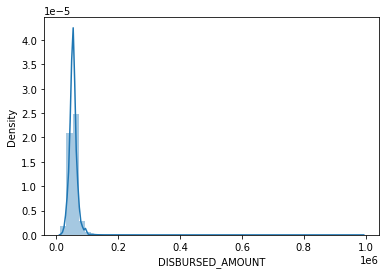

In [199]:
#DISBURSED_AMOUNT
sns.distplot(df["DISBURSED_AMOUNT"])
print("skew:",df["DISBURSED_AMOUNT"].skew())


DISBURSED_AMOUNT shows the Amount of Loan to pay out is highly right skewed 


skew: 4.4922396638902455


68000    681
67000    596
72000    539
70000    505
74000    469
Name: ASSET_COST, dtype: int64

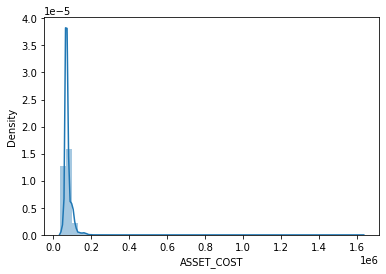

In [200]:
#Asset Cost
sns.distplot(df["ASSET_COST"]) 
print("skew:",df["DISBURSED_AMOUNT"].skew())
df["ASSET_COST"].value_counts().head()


#The original cost of an asset on which loan is approved takes into consideration which shows the data is right skewed and top assest_cost is shown

skew: -1.0757660644024252


count   233154.000
mean        74.747
std         11.457
min         10.030
25%         68.880
50%         76.800
75%         83.670
max         95.000
Name: LTV, dtype: float64

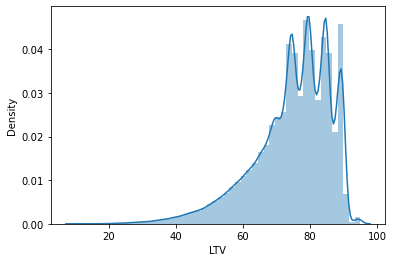

In [201]:
sns.distplot(df["LTV"])
print("skew:",df["LTV"].skew())
df["LTV"].value_counts().head()
df["LTV"].describe()



#Loan to Value of the asset shows the ration of DISBURSED_AMOUNT and ASSET_COST shows data is right skewed and 
95% of loan to value ration shows highest frequency as the DISBURSED_AMOUNT and ASSET_COST increases LTV ration also increases

In [202]:
df.BRANCH_ID.nunique()

82

In [203]:
pd.crosstab

<function pandas.core.reshape.pivot.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'>

2     13138
67    11328
3      9230
5      9218
36     8832
Name: BRANCH_ID, dtype: int64

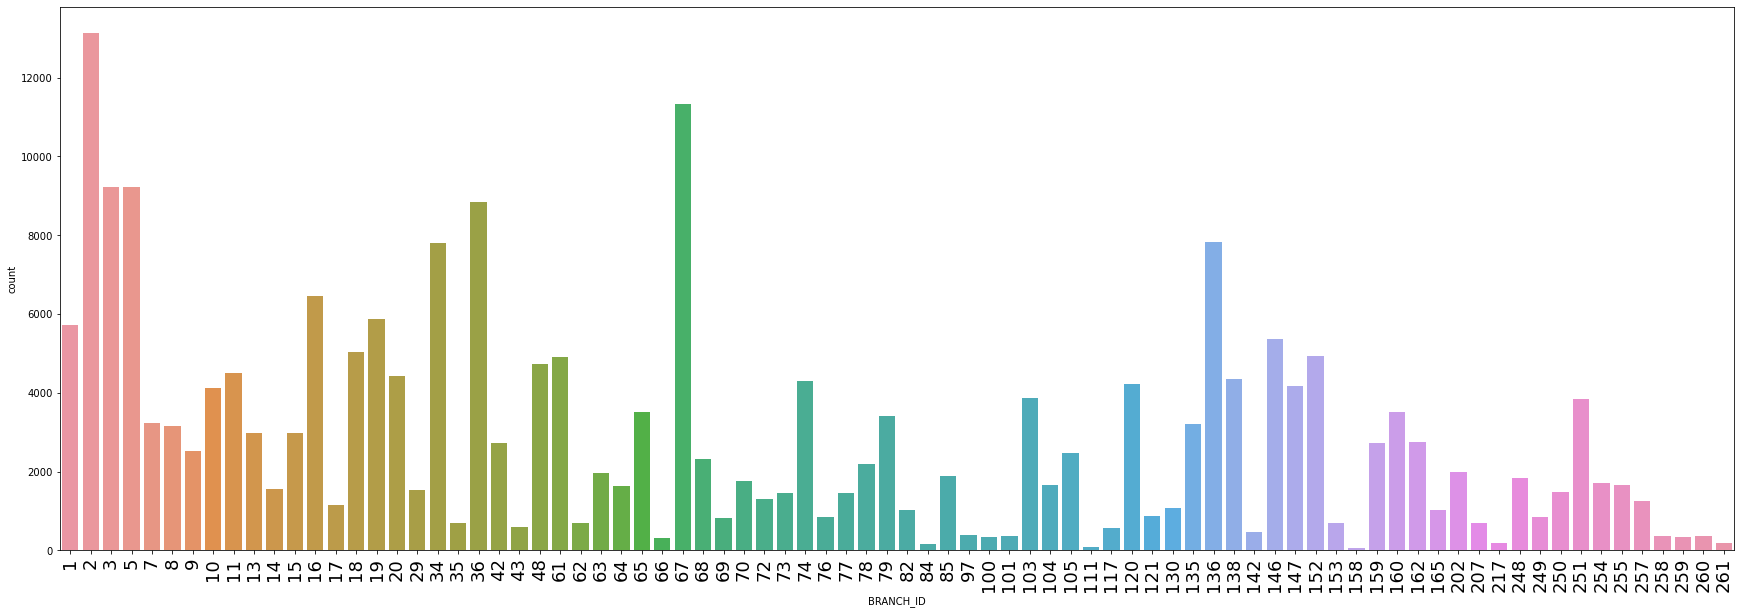

In [204]:
plt.figure(figsize=(30,10))
sns.countplot(df["BRANCH_ID"])
plt.xticks(rotation=90,fontsize=18)

df["BRANCH_ID"].describe()
df["BRANCH_ID"].value_counts().head()


Branch of the bank  where the loan was disbursed shows that branch id 2 has highest count and has 82 unique branch id.


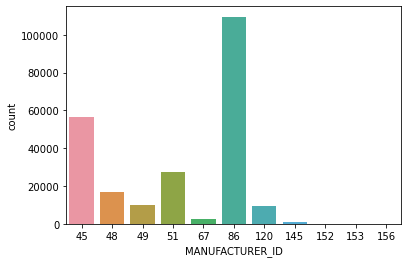

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: MANUFACTURER_ID, dtype: int64

In [217]:
sns.countplot(df["MANUFACTURER_ID"])
plt.show()
df["MANUFACTURER_ID"].value_counts()


MANUFACTURER_ID represent Vehicle manufacturer for the particular vehicle, in 86 has sold the highest number of vehicles on loan.


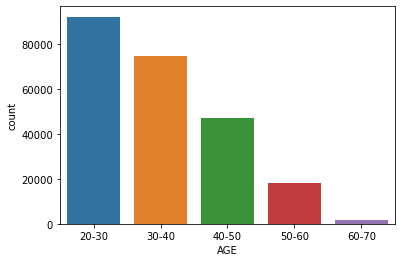

20-30    92039
30-40    74447
40-50    46802
50-60    18305
60-70     1561
Name: AGE, dtype: int64

In [206]:
#AGE -

sns.countplot(df.AGE.sort_values())
plt.show()
df.AGE.value_counts()



Inference:
    
Age group of 20-30 years are taking more loan on vehicle than other age groups.

As the age groups are increasing the number of persons taking loan is also decreasing.

MOBILENO_AVL_FLAG count plot


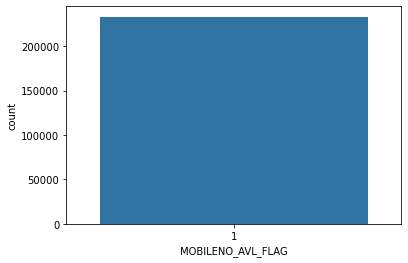

Category Count
1    233154
Name: MOBILENO_AVL_FLAG, dtype: int64
Category Percentage
1   100.000
Name: MOBILENO_AVL_FLAG, dtype: float64
-------------------------------------------------------------------------------------


AADHAR_FLAG count plot


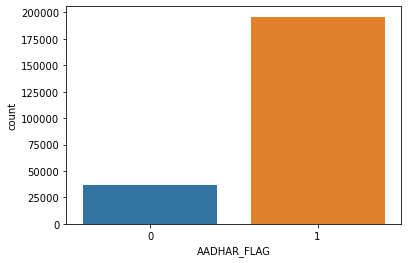

Category Count
1    195924
0     37230
Name: AADHAR_FLAG, dtype: int64
Category Percentage
1   84.032
0   15.968
Name: AADHAR_FLAG, dtype: float64
-------------------------------------------------------------------------------------


PAN_FLAG count plot


Category Count
0    215533
1     17621
Name: PAN_FLAG, dtype: int64
Category Percentage
0   92.442
1    7.558
Name: PAN_FLAG, dtype: float64
-------------------------------------------------------------------------------------


VOTERID_FLAG count plot


Category Count
0    199360
1     33794
Name: VOTERID_FLAG, dtype: int64
Category Percentage
0   85.506
1   14.494
Name: VOTERID_FLAG, dtype: float64
-------------------------------------------------------------------------------------


DRIVING_FLAG count plot


Category Count
0    227735
1      5419
Name: DRIVING_FLAG, dtype: int64
Category Percentage
0   97.676
1    2.324
Name: DRIVING_FLAG, dtype: float64
-------------------------------------------------------------------------------------


PASSPORT_FLAG count plot


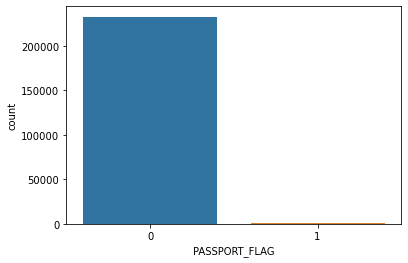

Category Count
0    232658
1       496
Name: PASSPORT_FLAG, dtype: int64
Category Percentage
0   99.787
1    0.213
Name: PASSPORT_FLAG, dtype: float64
-------------------------------------------------------------------------------------




In [207]:
#FLAG VARIABLES - UNIVARIATE ANALYSIS

for i in ['MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG',
          'DRIVING_FLAG', 'PASSPORT_FLAG']:
    print(i,'count plot')
    sns.countplot(df[i])
    plt.show()
    print('Category Count')
    print(df[i].value_counts())
    print('Category Percentage')
    print(df[i].value_counts()*100/len(df))
    print('-------------------------------------------------------------------------------------\n\n')

Inferences:
1. All loan applicants have submitted the mobile number, so may be it is mandatory to apply for loan.Hence this variable will not make any impact to our model and can be dropped.
2. The number of people who submitted their passport is very negligible.
3. Aadhar card is submitted by most of the applicants (around 80%), looks like people are more comfortable sharing Aadhar card than pan card and voter id.
4. Passport flag and driving licence flag can also be removed as passport is submitted by only 0.2% and driving license by 2%.





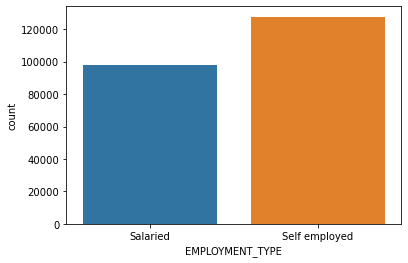

Self employed    127635
Salaried          97858
Name: EMPLOYMENT_TYPE, dtype: int64

In [208]:
sns.countplot(df.EMPLOYMENT_TYPE)
plt.show()
df.EMPLOYMENT_TYPE.value_counts()

Inference:
Self employed people tend to buy more vehicles on loan than salaried persons.

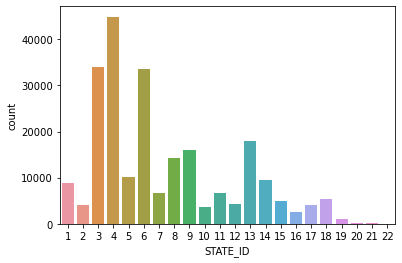

top5:


4     44870
3     34078
6     33505
13    17884
9     16022
Name: STATE_ID, dtype: int64

In [218]:
sns.countplot(df.STATE_ID)
plt.show()
print('top5:')
df.STATE_ID.value_counts().sort_values(ascending=False).head(5)


Inference:
People from State 4 has taken more number of loans followed by state 3 and state 6.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'nodata'),
  Text(1, 0, 'medium_risk'),
  Text(2, 0, 'very_high_risk'),
  Text(3, 0, 'very_low_risk'),
  Text(4, 0, 'low_risk'),
  Text(5, 0, 'high_risk')])

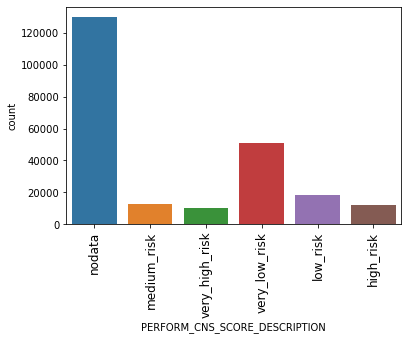

In [210]:
sns.countplot(df['PERFORM_CNS_SCORE_DESCRIPTION'])
plt.xticks(rotation=90,fontsize=12)


Many customers are new loanees as they have no CNS score.

In [211]:
#CNS SCORE
plt.figure(figsize=(8,6))
sns.histplot(df['PERFORM_CNS_SCORE'],kde=True)
#plot(kind='kde')
plt.show()
print('skew',df['PERFORM_CNS_SCORE'].skew())
print('kurt',df['PERFORM_CNS_SCORE'].kurt())

skew 0.44515046415251963
kurt -1.6352575159541496


majority  of the loan applicants were having the score 0 
Resasons for 0:

1) improper details attached

2) irregular Activites

3) new loanees or first time the users are taking loan


plato kurtic except 0 cns score all having equal probability distribution

In [212]:
#PRI_NO_OF_ACCTS is number of times every individual applied for loan before 

PRI_NO_OF_ACCTS=pd.DataFrame()
counts=df['PRI_NO_OF_ACCTS'].value_counts()
PRI_NO_OF_ACCTS['counts']=counts
PRI_NO_OF_ACCTS['percentage']=PRI_NO_OF_ACCTS['counts']*100/len(df)
PRI_NO_OF_ACCTS

counts  percentage
0    116950      50.160
1     34978      15.002
2     19784       8.485
3     13015       5.582
4      9323       3.999
5      7222       3.098
6      5557       2.383
7      4411       1.892
8      3570       1.531
9      2884       1.237
10     2358       1.011
11     1919       0.823
12     1567       0.672
13     1401       0.601
14     1132       0.486
15      941       0.404
16      798       0.342
17      652       0.280
18      573       0.246
19      503       0.216
20      436       0.187
21      347       0.149
22      323       0.139
24      286       0.123
23      250       0.107
25      187       0.080
26      170       0.073
27      153       0.066
28      141       0.060
29      130       0.056
30      124       0.053
31      111       0.048
32       83       0.036
35       73       0.031
34       70       0.030
33       67       0.029
37       53       0.023
38       53       0.023
36       49       0.021
40       41       0.018
39       34       0.015
43       32       0.014
41       31       0.013
42       25       0.011
45       24       0.010
47       23       0.010
46       20       0.009
44       17       0.007
51       17       0.007
50       16       0.007
49       14       0.006
48       14       0.006
54       12       0.005
53       11       0.005
56       10       0.004
60       10       0.004
52        9       0.004
57        9       0.004
59        9       0.004
63        7       0.003
55        7       0.003
58        7       0.003
61        7       0.003
72        6       0.003
68        6       0.003
78        5       0.002
65        5       0.002
64        5       0.002
62        5       0.002
66        4       0.002
67        4       0.002
71        4       0.002
74        4       0.002
91        3       0.001
93        3       0.001
69        3       0.001
87        3       0.001
76        3       0.001
77        3       0.001
94        2       0.001
90        2       0.001
108       2       0.001
84        2       0.001
82        2       0.001
81        2       0.001
148       2       0.001
73        2       0.001
70        2       0.001
354       1       0.000
120       1       0.000
114       1       0.000
113       1       0.000
271       1       0.000
104       1       0.000
102       1       0.000
100       1       0.000
99        1       0.000
136       1       0.000
147       1       0.000
132       1       0.000
131       1       0.000
194       1       0.000
88        1       0.000
453       1       0.000
86        1       0.000
85        1       0.000
83        1       0.000
124       1       0.000

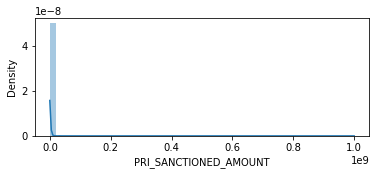

In [213]:
df_pri=df[['PRI_CURRENT_BALANCE','PRI_SANCTIONED_AMOUNT','PRI_DISBURSED_AMOUNT']]
for i,col in enumerate(df_pri.columns,1):
    plt.figure(figsize=(6,10))
    plt.subplot(4,1,i)
    sns.distplot(df[col])
    
plt.show()

1) The PRI_CURRENT_BALANCE of majority of the applicants is 0,which indicates that probably most of the applicants closed their loans. 

2) The PRI_SANCTIONED_AMOUNT of majority of the applicants is 0,so we can infer that majority of the applicants loan has not been sanctioned yet.

3) The PRI_DISBURSED_AMOUNT of majority of the applicants is 0,which indicates that most of the amount has not been disbursed.

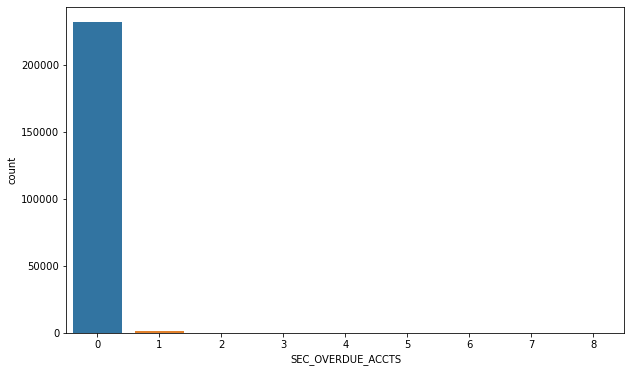

In [214]:
active_overdue=['PRI_ACTIVE_ACCTS','PRI_OVERDUE_ACCTS','SEC_ACTIVE_ACCTS','SEC_OVERDUE_ACCTS']

for i in active_overdue:
    plt.figure(figsize=(10,6))
    sns.countplot(df[i])
    plt.show()


Inferences:

1. majority loan applicants were applying loan for the who dose'nt have current active loans.

2. Majority of the Primary Overdue Loans and Secondary Overdue Loans count is showing 0,which indicates that the number of defaulters are very few,and also it we can infer that people are paying their EMI's within due date itself.

3. Majority of the Secondary Active Loans are 0,which indicates that  most of the people closed their loans aAt the same time we can see that some of the people have very few number of secondary active loans.

In [215]:
SEC_NO_OF_ACCTS=pd.DataFrame()
counts=df['SEC_NO_OF_ACCTS'].value_counts()
SEC_NO_OF_ACCTS['counts']=counts
SEC_NO_OF_ACCTS['percentage']=SEC_NO_OF_ACCTS['counts']*100/len(df)
SEC_NO_OF_ACCTS

counts  percentage
0   227289      97.484
1     3466       1.487
2     1036       0.444
3      444       0.190
4      292       0.125
5      148       0.063
6      119       0.051
7       75       0.032
8       68       0.029
9       38       0.016
10      35       0.015
11      29       0.012
13      17       0.007
12      13       0.006
14      11       0.005
16      11       0.005
15      10       0.004
19       6       0.003
18       6       0.003
17       5       0.002
20       4       0.002
22       4       0.002
23       4       0.002
31       4       0.002
21       3       0.001
46       2       0.001
38       2       0.001
34       2       0.001
30       2       0.001
24       2       0.001
29       1       0.000
28       1       0.000
35       1       0.000
37       1       0.000
25       1       0.000
42       1       0.000
52       1       0.000

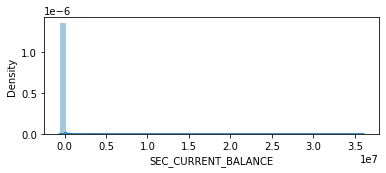

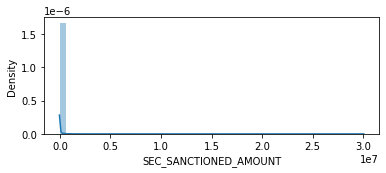

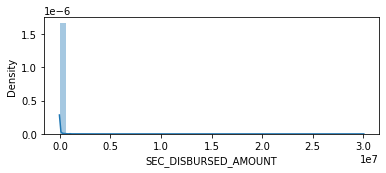

In [216]:
df_sec=df[[ 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT']]

for i,col in enumerate(df_sec.columns,1):
    plt.figure(figsize=(6,15))
    plt.subplot(6,1,i)
    sns.distplot(df[col])
    
plt.show()

1. Secondary loans are also very less which indicates that joint loans taken by people are very less

2. The secondary active loans are very few,from this we can infer that probably people have closed their secondary active loans.

3. Majority of the  secondary sanctioned amount is 0,which indicates that most of the loan applicants have not been guarantor for other loans

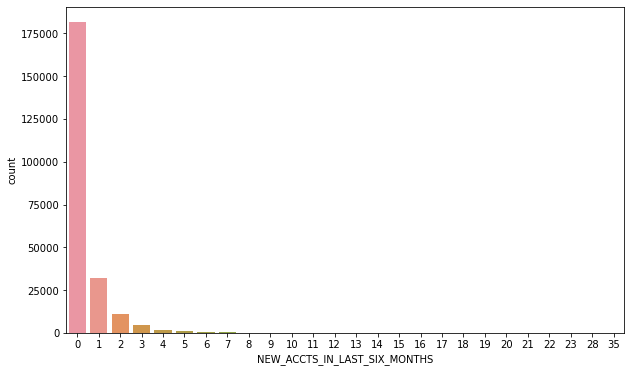

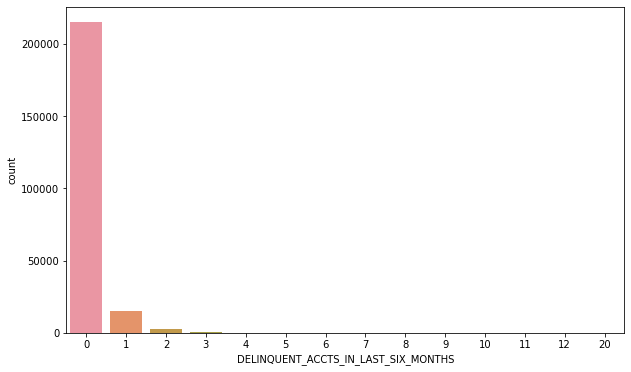

In [98]:
new_deliquent_last_6_months=['NEW_ACCTS_IN_LAST_SIX_MONTHS','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS']

for i in new_deliquent_last_6_months:
    plt.figure(figsize=(10,6))
    sns.countplot(df[i])
    plt.show()

1. majority among the loan applicants have already taken loan in last 6 
months before the  date of disbursment.

2. majority among the loan applicants didn't defaulted their loan in the past 6 months.

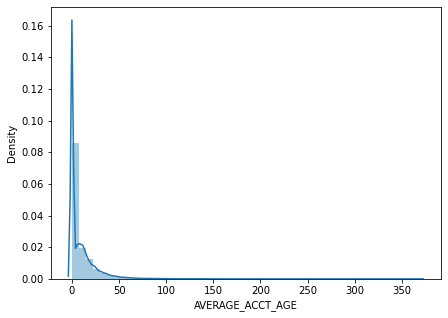

In [99]:
plt.figure(figsize=(7,5))
sns.distplot(df['AVERAGE_ACCT_AGE'])
plt.show()

We can see that the count of different AVERAGE_ACCT_AGE value present in the dataset and infer that the 
average loan tenure of majority of the loans is come under around 30 months.

In [100]:
plt.figure(figsize=(7,5))
sns.distplot(df['CREDIT_HISTORY_LENGTH'])
plt.show()

Here the credit history length is the time period between first loan and the current loan ,from this we can infer that for most of the people ,the time gap  between their first loan and current loan is between 10 to 50 months.
The second inference is that most of the people are new applicants because of that the credit history length is 0.

<AxesSubplot:xlabel='NO_OF_INQUIRIES', ylabel='count'>

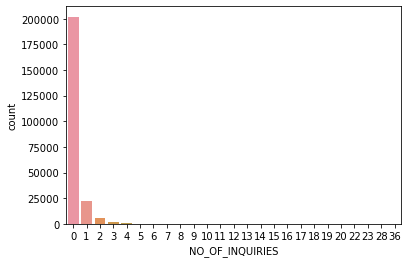

In [101]:
sns.countplot(df.NO_OF_INQUIRIES)

Number of Enquries done by the customer for loans are mostly in section of zero.

In [122]:
import plotly.express as px 
fig = px.pie(values=df.LOAN_DEFAULT.value_counts(), names=['Not defaulted','Defaulted']) 
fig.show()

In [123]:
# Count and %
Count_Normal_transacation = len(df[df['LOAN_DEFAULT']==0])
Count_Fraud_transacation = len(df[df['LOAN_DEFAULT']==1]) 
Percentage_of_Normal_transacation = Count_Normal_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of no defaults       :', Percentage_of_Normal_transacation*100)
print('Number of no defaults     :', Count_Normal_transacation)
Percentage_of_Fraud_transacation= Count_Fraud_transacation/(Count_Normal_transacation+Count_Fraud_transacation)
print('% of defaults         :',Percentage_of_Fraud_transacation*100)
print('Number of defaults    :', Count_Fraud_transacation)

% of no defaults       : 78.29288796246257
Number of no defaults     : 182543
% of defaults         : 21.70711203753742
Number of defaults    : 50611


The distribution of the target column shows that there are 21.7% of loan defaulters and 78.3% of defaulters.
So from this we can infer that there are less number of  defaulters compare with Non-defaulters,so majority
of the customers are not make any defaults in their loans. 

# BIVARIATE ANALYSIS

#### LOAN_DEFAULT  V/S  AGE

In [124]:
plt.figure(figsize=(8,5))
sns.countplot(df['LOAN_DEFAULT'], hue = df['AGE'])
plt.xlabel('LOAN_DEFAULT', size = 18)
plt.ylabel('Count', size = 18)
plt.show()

1.Here we can see that when we considering the count 70000 of people in the age group of 20-30 are non-defaulters at the same time more number of defaulters (ie.20000) are from the same age group.So we have to look over these age groups while lending loans.

2.People from the age group of 30-40,around 60000 of people are non-defaulters and around 18000 are non-defaulters.
3.People from the age group of 40-50 are followed by people in the age group of 30-40 .
4.People in the age group of 60-70 ,looks like there are very less number defaulters and non-defaulters,this is because probably people of these age groups are taking loans rarely.

#### PERFORMANCE_CNS_DESCRIPTION V/S LOAN_DEFAULT

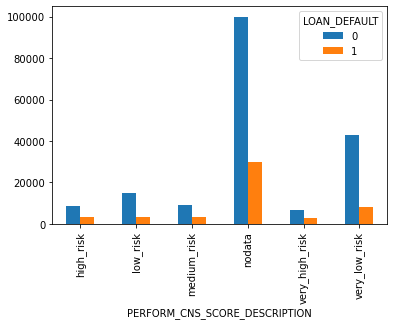

In [125]:

pd.crosstab(df['PERFORM_CNS_SCORE_DESCRIPTION'],df['LOAN_DEFAULT']).plot(kind='bar')
plt.show()

The plot shows the relation between PERFORM_CNS_SCORE_DESCRIPTION v/s LOAN_DEFAULT

1) From this plot we can see that almost around 100000 of non-defaulters are under the category of nodata,from our understanding we would say that the people who taking the loans at very first time their cibil score would be 0 and also almost around 25000 of defaulters are under the nodata category.

2) There is around 40000 of non-defaulters are under the very-low-risk category but we can see that the count of defaulters is very less here this is because  they are making defaults in loans so their cibil score will get down.

3) In medium_risk and low_risk categories there are more non-defaulters when compared  with defaulters.

4) From all of these understandings finally we can infer that more number of defaulters come under risk category than non-defaulters.

#### EMPLOYMENT_TYPE  V/S LOAN_DEFAULT

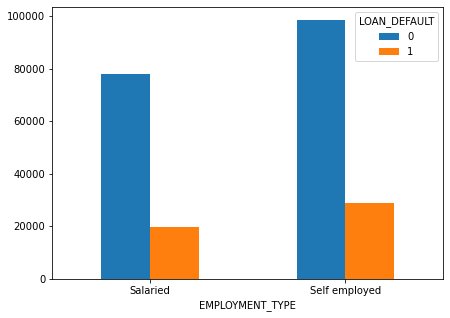

LOAN_DEFAULT         0      1  Defaulters_Percentage
EMPLOYMENT_TYPE                                     
Salaried         77948  19910                 20.346
Self employed    98578  29057                 22.766

In [126]:
pd.crosstab(df['EMPLOYMENT_TYPE'],df['LOAN_DEFAULT']).plot(kind='bar',figsize=(7,5),rot=0)
plt.show()
print('\n')
d1=pd.crosstab(index=df['EMPLOYMENT_TYPE'],columns=df['LOAN_DEFAULT'])
d1['Defaulters_Percentage']=(d1[1]/(d1[1]+d1[0]))*100
d1



Inference:
    
Salaried laonees has default rate of 20.34% where as Self Employeed loanees has default rate of 22.7% 

There is no much difference in the default rates between the two classes of Employment.

#### STATE_ID  V/S LOAN_DEFAULT

In [127]:
pd.crosstab(df['STATE_ID'],df['LOAN_DEFAULT']).plot(kind='bar',figsize=(18,5))
plt.show()
d2=pd.crosstab(index=df['STATE_ID'],columns=df['LOAN_DEFAULT'])
d2['Defaulters_percentage']=(d2[1]/(d2[1]+d2[0]))*100
d2.sort_values('Defaulters_percentage',ascending=False)

LOAN_DEFAULT      0     1  Defaulters_percentage
STATE_ID                                        
13            12401  5483                 30.659
14             6817  2597                 27.587
2              3031  1129                 27.139
12             3092  1118                 26.556
17             3010   981                 24.580
8             10939  3258                 22.949
18             4221  1191                 22.007
9             12530  3492                 21.795
15             3981  1068                 21.153
4             35544  9326                 20.784
6             26615  6890                 20.564
11             5348  1373                 20.429
7              5417  1369                 20.174
5              8154  2023                 19.878
21              125    31                 19.872
3             27733  6345                 18.619
16             2192   493                 18.361
19              848   187                 18.068
1              7353  1583                 17.715
10             2972   633                 17.559
20              153    32                 17.297
22               67     9                 11.842

Inference:

From the graph we can say more number of defaulters are from state 4.

But if we consider the percentages of defaulters state wise then state 13 has highest number of dafulters. Appropriate  measure should be taken to make defaulters percentage low.

INFERENCE:
    
Percentage of default_customers increases as the count of deliquent accounts and primaru over due accounts increases.

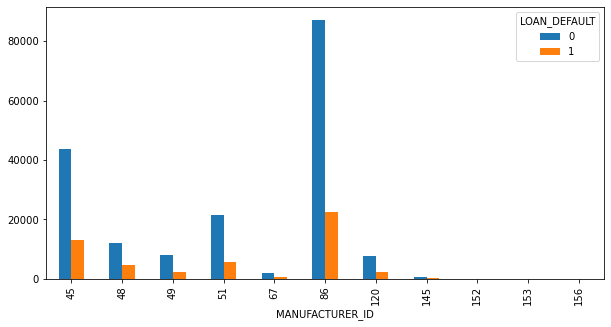

LOAN_DEFAULT         0      1  Defaulters_percentage
MANUFACTURER_ID                                     
153                  8      4                 33.333
48               12156   4554                 27.253
45               43687  12939                 22.850
120               7526   2132                 22.075
49                7984   2236                 21.879
67                1882    523                 21.746
51               21547   5657                 20.795
86               87124  22410                 20.459
145                622    156                 20.051
152                  6      0                  0.000
156                  1      0                  0.000

In [130]:
pd.crosstab(df['MANUFACTURER_ID'],df['LOAN_DEFAULT']).plot(kind='bar',figsize=(10,5))
plt.show()
d6=pd.crosstab(index=df['MANUFACTURER_ID'],columns=df['LOAN_DEFAULT'])
d6['Defaulters_percentage']=(d6[1]/(d6[1]+d6[0]))*100
d6.sort_values('Defaulters_percentage',ascending=False)

In [131]:
Inference:

From graph we can see brand with manufacturer ID 86 has more number of loan defaults, but also has less number of loan non- defaulters. We can infer that people are more interested in purchasing vehicle from brand 86.

Brand 153 has more defaulter rate than any other brand, but also have very less vehicles sold, may be they are new to market or any luxury brand that no everyone prefers

SyntaxError: invalid syntax (<ipython-input-131-04b59917bbf4>, line 1)

In [132]:
sns.scatterplot(y=df['DISBURSED_AMOUNT'],x=df['ASSET_COST'])

<AxesSubplot:xlabel='ASSET_COST', ylabel='DISBURSED_AMOUNT'>

for higher assest cost higher is the loan amount disbursed

#### LOAN_DEFAULT  V/S  LTV Ratio

In [133]:
d0=df[df['LOAN_DEFAULT']==0]['LTV']
d1=df[df['LOAN_DEFAULT']==1]['LTV']

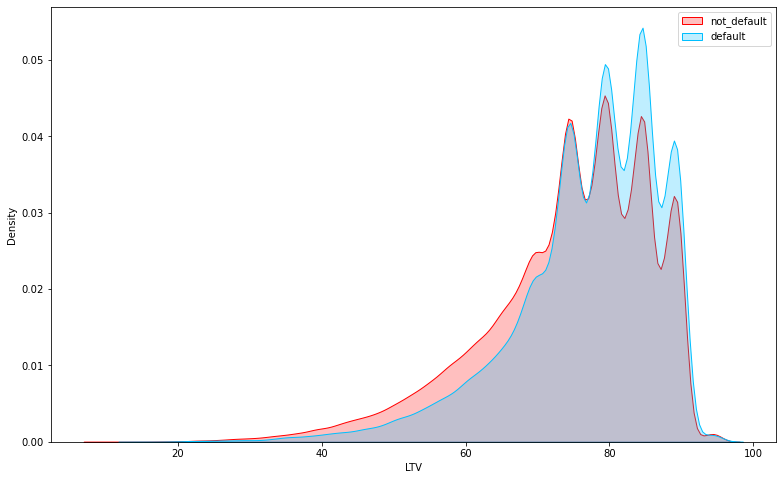

In [134]:
plt.figure(figsize=(13,8))
a=sns.kdeplot(d0,color='red',shade=True)
a=sns.kdeplot(d1,color='deepskyblue',shade=True)
a.legend(['not_default','default'],loc='upper right')

1) No much difference in density of LTV in case of both default and not default 

2) Both are having almost similar left skewed distribution

3) It can be inferred that for lesser LTV RATIO customer defaults ration is also lesser

<AxesSubplot:xlabel='SEC_SANCTIONED_AMOUNT', ylabel='SEC_CURRENT_BALANCE'>

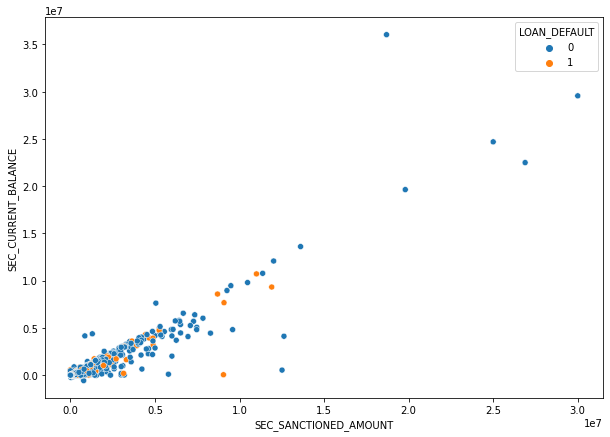

In [135]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='SEC_SANCTIONED_AMOUNT',y='SEC_CURRENT_BALANCE',hue='LOAN_DEFAULT',data=df)

Here we can see that SEC_SANCTIONED_AMOUNT and SEC_CURRENT_BALANCE are positevely related each otehr.
when secondary sanctioned amount is increasing the total principal amount for the active loans is also increasing for defaulters and non-defaulters

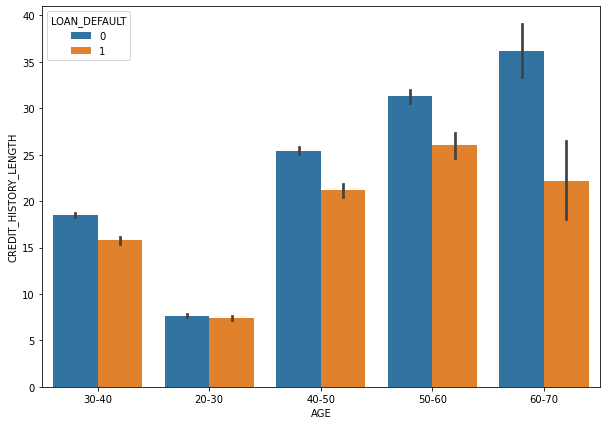

In [136]:
plt.figure(figsize=(10,7))
sns.barplot(x='AGE',y='CREDIT_HISTORY_LENGTH',hue='LOAN_DEFAULT',data=df)
plt.show()

AGE and CREDIT_HISTORY_LENGTH are highly dependent and hence we can infer that the age group of 20-30 have less credit score
due to which CREDIT_HISTORY_LENGTH is minimum for low age group  
where as age group of 60-70 has higher CREDIT_HISTORY_LENGTH as their credit scores is maintained,
Hence higher the age group more will be the CREDIT_HISTORY_LENGTH.

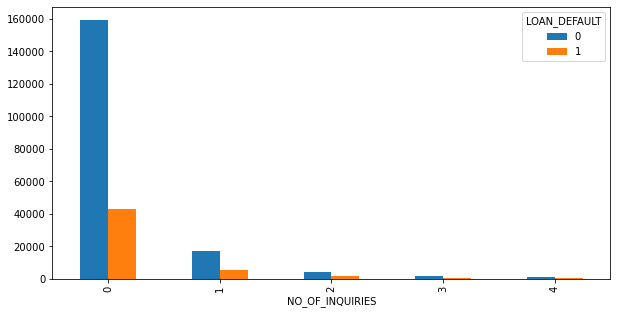

LOAN_DEFAULT          0      1  Defaulters_percentage
NO_OF_INQUIRIES                                      
4                  1127    605                 34.931
3                  1250    517                 29.259
2                  3918   1491                 27.565
1                 16844   5441                 24.416
0                159404  42557                 21.072

In [137]:
pd.crosstab(df['NO_OF_INQUIRIES'],df['LOAN_DEFAULT']).plot(kind='bar',figsize=(10,5))
plt.show()
d7=pd.crosstab(index=df['NO_OF_INQUIRIES'],columns=df['LOAN_DEFAULT'])
d7['Defaulters_percentage']=(d7[1]/(d7[1]+d7[0]))*100
d7.sort_values('Defaulters_percentage',ascending=False)

Inference:

As the number of inquiries increases, the percentages of loan_defaulters rises. There might be chance that
that their loan were not approved earlier due to default of their earlier loans and hence so they are inquiring about loans repeatedly.


In [138]:
df.corr()

DISBURSED_AMOUNT  ASSET_COST    LTV  \
DISBURSED_AMOUNT                                1.000       0.753  0.377   
ASSET_COST                                      0.753       1.000 -0.301   
LTV                                             0.377      -0.301  1.000   
PERFORM_CNS_SCORE                               0.011      -0.047  0.085   
PRI_NO_OF_ACCTS                                 0.035      -0.045  0.114   
PRI_ACTIVE_ACCTS                                0.041      -0.027  0.098   
PRI_OVERDUE_ACCTS                               0.021      -0.016  0.056   
PRI_CURRENT_BALANCE                             0.016      -0.004  0.027   
PRI_SANCTIONED_AMOUNT                           0.006      -0.001  0.010   
PRI_DISBURSED_AMOUNT                            0.006      -0.001  0.010   
SEC_NO_OF_ACCTS                                -0.017      -0.028  0.019   
SEC_ACTIVE_ACCTS                               -0.016      -0.023  0.013   
SEC_OVERDUE_ACCTS                              -0.006      -0.013  0.011   
SEC_CURRENT_BALANCE                            -0.004      -0.009  0.007   
SEC_SANCTIONED_AMOUNT                          -0.005      -0.011  0.009   
SEC_DISBURSED_AMOUNT                           -0.005      -0.011  0.009   
PRIMARY_INSTAL_AMT                              0.002      -0.004  0.007   
SEC_INSTAL_AMT                                 -0.006      -0.006  0.000   
NEW_ACCTS_IN_LAST_SIX_MONTHS                    0.036      -0.024  0.087   
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS             0.021      -0.009  0.044   
AVERAGE_ACCT_AGE                                0.004      -0.016  0.030   
CREDIT_HISTORY_LENGTH                           0.013      -0.024  0.054   
NO_OF_INQUIRIES                                 0.045      -0.019  0.097   

                                     PERFORM_CNS_SCORE  PRI_NO_OF_ACCTS  \
DISBURSED_AMOUNT                                 0.011            0.035   
ASSET_COST                                      -0.047           -0.045   
LTV                                              0.085            0.114   
PERFORM_CNS_SCORE                                1.000            0.742   
PRI_NO_OF_ACCTS                                  0.742            1.000   
PRI_ACTIVE_ACCTS                                 0.610            0.864   
PRI_OVERDUE_ACCTS                                0.125            0.408   
PRI_CURRENT_BALANCE                              0.148            0.272   
PRI_SANCTIONED_AMOUNT                            0.079            0.141   
PRI_DISBURSED_AMOUNT                             0.078            0.141   
SEC_NO_OF_ACCTS                                  0.086            0.108   
SEC_ACTIVE_ACCTS                                 0.067            0.082   
SEC_OVERDUE_ACCTS                                0.038            0.050   
SEC_CURRENT_BALANCE                              0.020            0.026   
SEC_SANCTIONED_AMOUNT                            0.024            0.032   
SEC_DISBURSED_AMOUNT                             0.024            0.032   
PRIMARY_INSTAL_AMT                               0.071            0.163   
SEC_INSTAL_AMT                                   0.016            0.021   
NEW_ACCTS_IN_LAST_SIX_MONTHS                     0.385            0.593   
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS              0.183            0.354   
AVERAGE_ACCT_AGE                                 0.475            0.450   
CREDIT_HISTORY_LENGTH                            0.472            0.625   
NO_OF_INQUIRIES                                  0.167            0.250   

                                     PRI_ACTIVE_ACCTS  PRI_OVERDUE_ACCTS  \
DISBURSED_AMOUNT                                0.041              0.021   
ASSET_COST                                     -0.027             -0.016   
LTV                                             0.098              0.056   
PERFORM_CNS_SCORE                               0.610              0.125   
PRI_NO_OF_ACCTS                

In [139]:
df['LOAN_DEFAULT']=df['LOAN_DEFAULT'].astype(int)

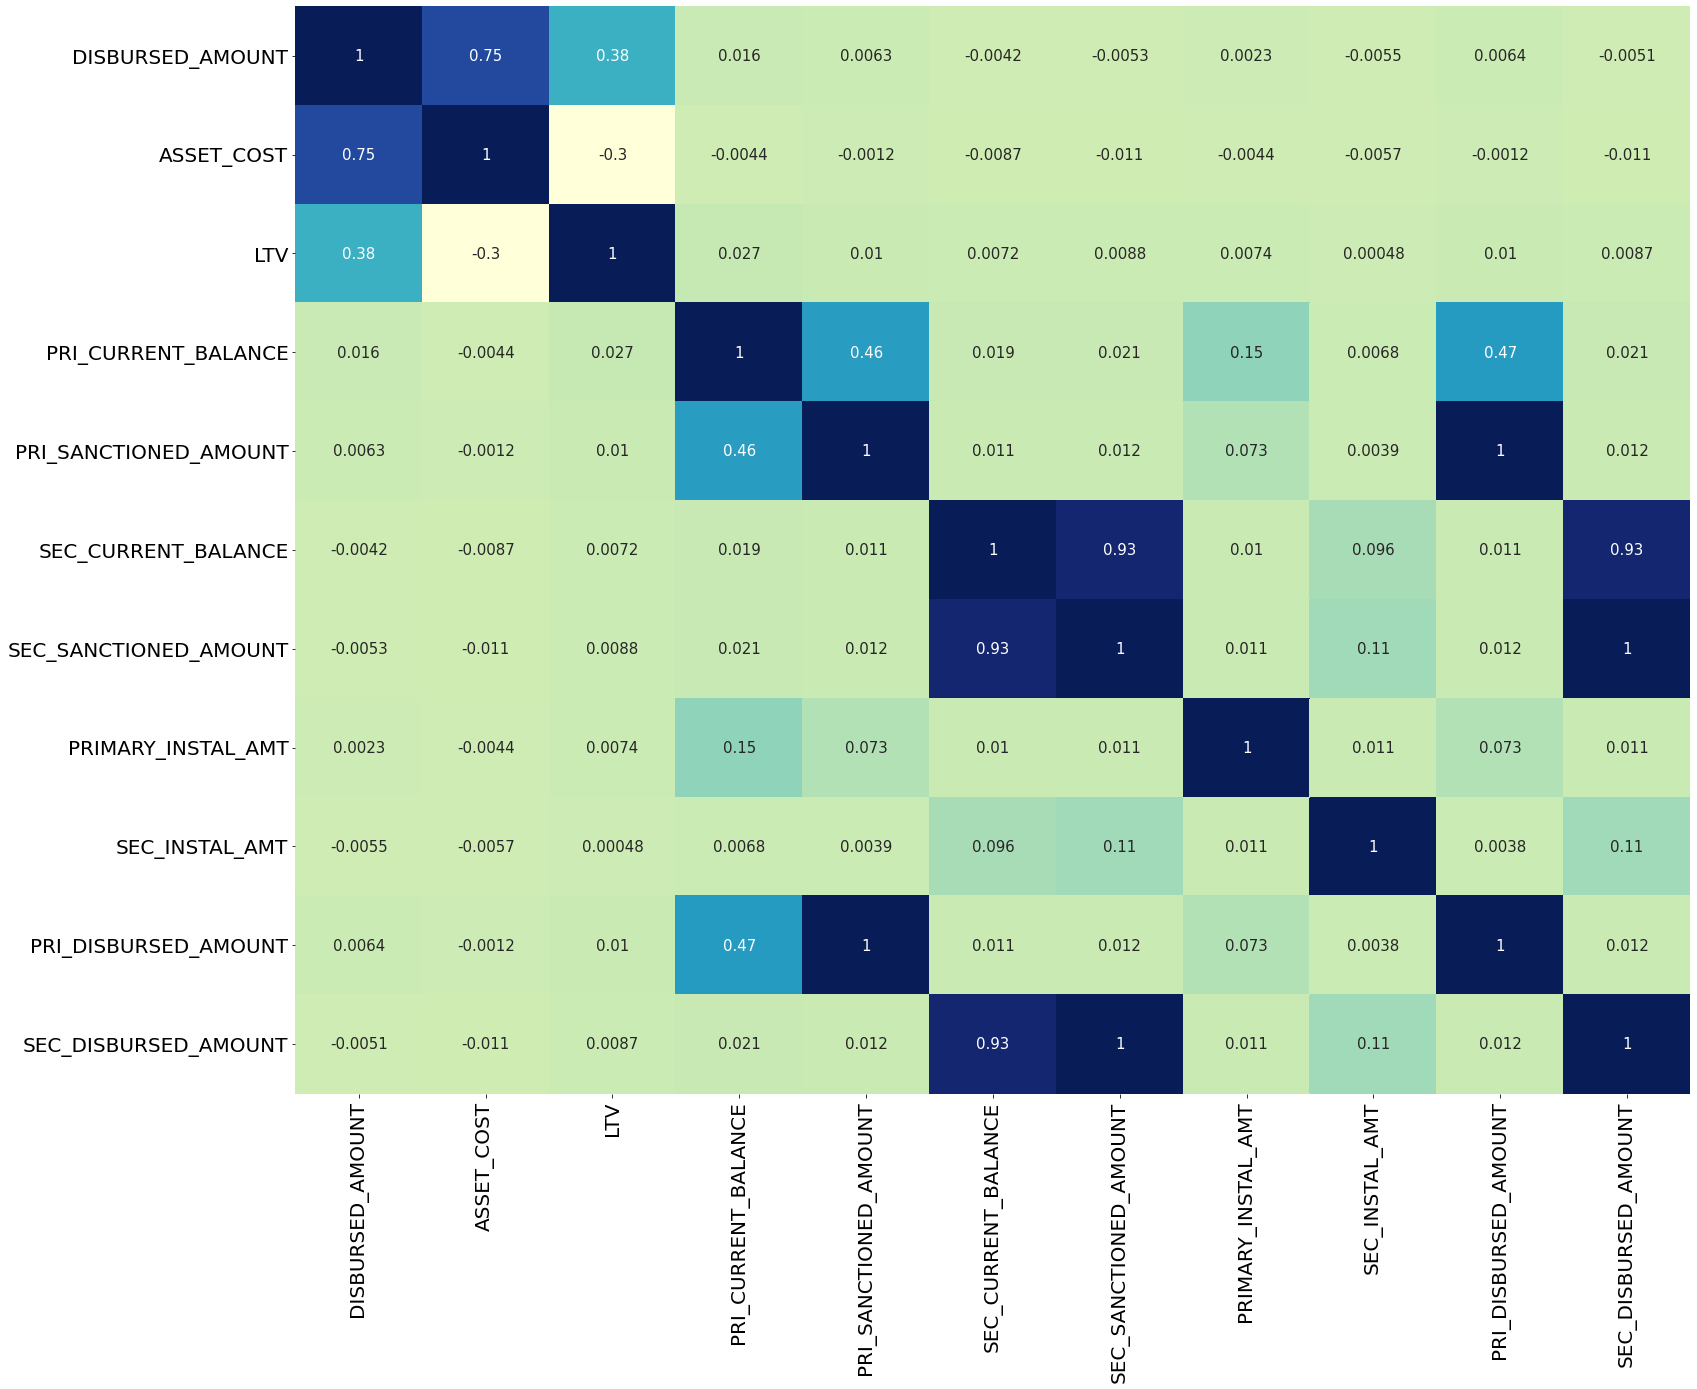

In [185]:
plt.figure(figsize=(25,20))
sns.heatmap(df[['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV','PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT','AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH','PRI_DISBURSED_AMOUNT','SEC_DISBURSED_AMOUNT']].corr(),annot=True,cbar=False,cmap='YlGnBu',annot_kws={"size": 15})
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)

plt.show()

<AxesSubplot:>

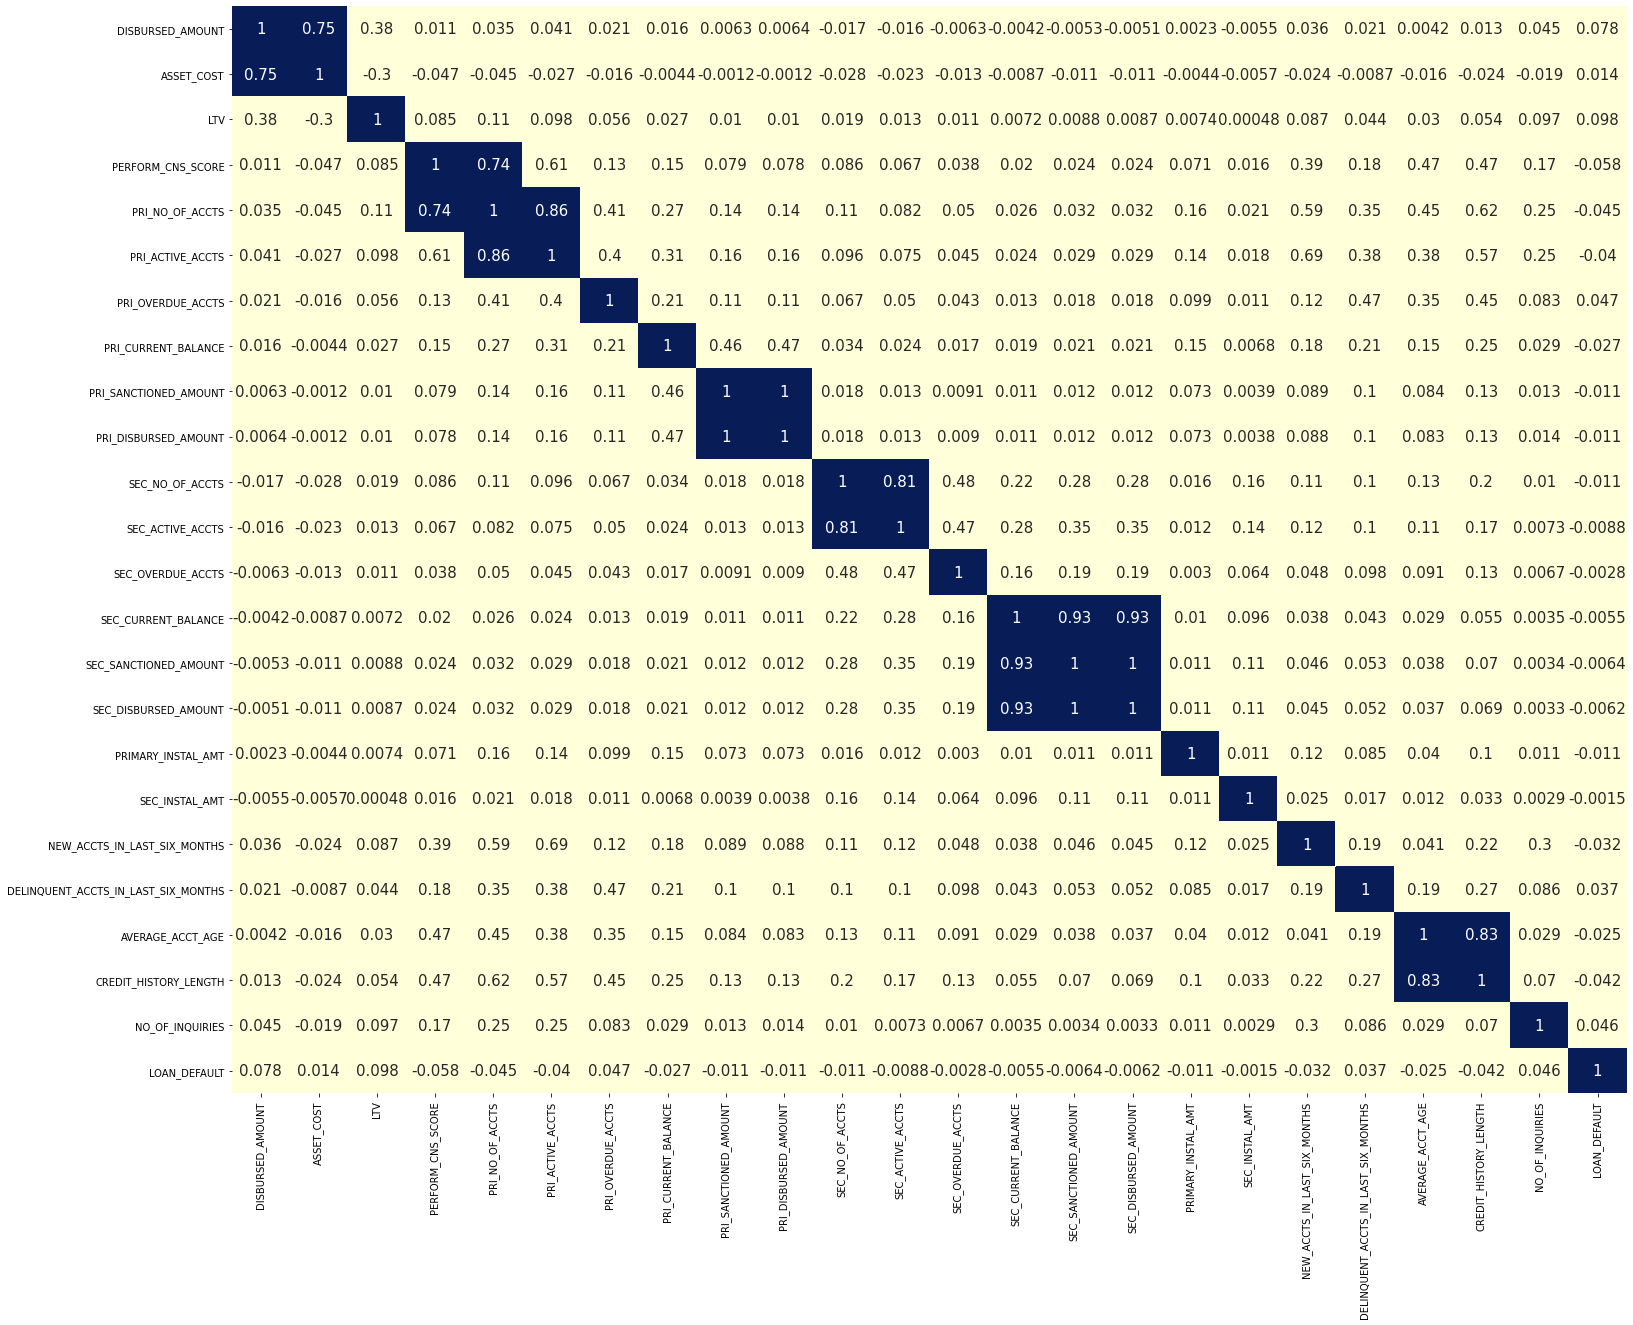

In [141]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr()>0.7,annot=df.corr(),cbar=False,cmap='YlGnBu',annot_kws={"size": 15})

In [142]:
#sns.pairplot(df)

1. 'DISBURSED_AMOUNT' and  'ASSET_COST' are highly correlated.
2. 'SEC_SANCTIONED_AMOUNT' and 'SEC_DISBURSED_AMOUNT' are prefectly correlated, hence we can remove either of them.
3. 'SEC_CURRENT_BALANCE' is hihgly correlated with 'SEC_SANCTIONED_AMOUNT' and 'SEC_DISBURSED_AMOUNT'
4. 'AVERAGE_ACCT_AGE' and 'CREDIT_HISTORY_LENGTH' are highly correlated (0.83)
5. 'NEW_ACCTS_IN_LAST_SIX_MONTHS' and 'PRI_ACTIVE_ACCTS' is having good correlation (0.7)
6. 'SEC_NO_OF_ACCTS' and 'SEC_ACTIVE_ACCTS' have good correlation (0.83)
7. 'PRI_SANCTIONED_AMOUNT' and 'PRI_DISBURSED_AMOUNT' are perfectly correlated with each other.
8. 'PRI_NO_OF_ACCTS'and 'PRI_ACTIVE_ACCTS' are having good correlation.

<AxesSubplot:xlabel='PRI_SANCTIONED_AMOUNT', ylabel='PRI_DISBURSED_AMOUNT'>

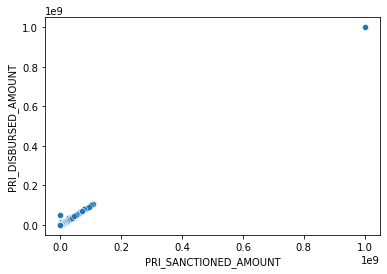

In [143]:
sns.scatterplot(df.PRI_SANCTIONED_AMOUNT, df.PRI_DISBURSED_AMOUNT)

<AxesSubplot:xlabel='SEC_SANCTIONED_AMOUNT', ylabel='SEC_DISBURSED_AMOUNT'>

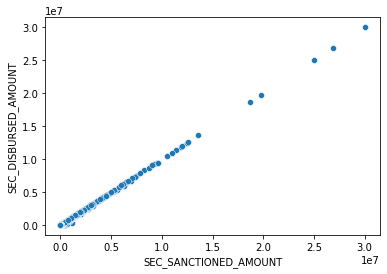

In [144]:
sns.scatterplot(df.SEC_SANCTIONED_AMOUNT, df.SEC_DISBURSED_AMOUNT)

In [145]:
#Dropping Columns and Rows based on the analysis:

#Dropping disbursal date as it may have very less effect on loanee being a loan default. Also we are not sure when the data was extracted to calcuate months since disbursal.

In [146]:
df.drop('DISBURSAL_DATE',axis=1,inplace=True)

In [147]:
x=df.select_dtypes(np.number)

for i in x.columns:
    print(i)
    print('maximum is:',max(df[i]),'\n minimum is:', min(df[i]))
    print('\n')

DISBURSED_AMOUNT
maximum is: 990572 
 minimum is: 13320


ASSET_COST
maximum is: 1628992 
 minimum is: 37000


LTV
maximum is: 95.0 
 minimum is: 10.03


PERFORM_CNS_SCORE
maximum is: 890 
 minimum is: 0


PRI_NO_OF_ACCTS
maximum is: 5 
 minimum is: 0


PRI_ACTIVE_ACCTS
maximum is: 4 
 minimum is: 0


PRI_OVERDUE_ACCTS
maximum is: 3 
 minimum is: 0


PRI_CURRENT_BALANCE
maximum is: 96524920 
 minimum is: -6678296


PRI_SANCTIONED_AMOUNT
maximum is: 1000000000 
 minimum is: 0


PRI_DISBURSED_AMOUNT
maximum is: 1000000000 
 minimum is: 0


SEC_NO_OF_ACCTS
maximum is: 2 
 minimum is: 0


SEC_ACTIVE_ACCTS
maximum is: 2 
 minimum is: 0


SEC_OVERDUE_ACCTS
maximum is: 1 
 minimum is: 0


SEC_CURRENT_BALANCE
maximum is: 36032852 
 minimum is: -574647


SEC_SANCTIONED_AMOUNT
maximum is: 30000000 
 minimum is: 0


SEC_DISBURSED_AMOUNT
maximum is: 30000000 
 minimum is: 0


PRIMARY_INSTAL_AMT
maximum is: 25642806 
 minimum is: 0


SEC_INSTAL_AMT
maximum is: 4170901 
 minimum is: 0


NEW_ACCTS_IN

In [148]:
#PRI_CURRENT_BALANCE and SEC_CURRENT_BALANCE has negative loan amounts, which is not possible.
#we will check its percentage, if they make less then we will drop them.

In [149]:
df[df['PRI_CURRENT_BALANCE'] < 0]['PRI_CURRENT_BALANCE'].count()*100/len(df)

0.19214767921631196

In [150]:
df[df['SEC_CURRENT_BALANCE'] < 0]['SEC_CURRENT_BALANCE'].count()*100/len(df)

0.026162965250435335

0.2 and 0.02 are the precentages of negative values in PRI_CURRENT_BALANCE & SEC_CURRENT_BALANCE.

Since there are <0.04 % negative values in SEC_CURRENT_BALANCE, we can directly drop those rows , but we are treating these rows as data entry error as loan amount will never be negative.

For PRI_CURRENT_BALANCE, since number of negative rows are >0.04%, we cannot drop them, so we are treating these rows as data entry error as loan amount will never be negative.

In [151]:
for i in df[df['PRI_CURRENT_BALANCE']<0]['PRI_CURRENT_BALANCE']:
    df['PRI_CURRENT_BALANCE'].replace(i,i*-1,inplace=True)

In [152]:
for i in df[df['SEC_CURRENT_BALANCE']<0]['SEC_CURRENT_BALANCE']:
    df['SEC_CURRENT_BALANCE'].replace(i,i*-1,inplace=True)

In [153]:
print('min of primary current balance',df['PRI_CURRENT_BALANCE'].min())
print('min of secondary current balance',df['SEC_CURRENT_BALANCE'].min())

min of primary current balance 0
min of secondary current balance 0


1. Removing Current Pincode, as it is dependent on state_id
2. Removing Mobile Number flag, as all the customers have given the mobile number
3. Date of Birth can be removed as we are fetching information from age.
4. whether a customer defaults or not doesn't depend on supplier, hence we are dropping supplier_id, also it depends on manufacturer ID
5. Employee_code_id can be removed, as it doesn't affect whether the loanee is defaulting or not. Employee just verifies
    and pass the loan.

6.  CNS score and CNS score description relation:
    706 to 890 - very low risk
    
    631-705  - low risk
    
    571-630 - medium risk
    
    351-570 - High Risk
    
    300-350 - very high risk
    
    <300 - no data
    
    As we can see CNS score description is related to CNS score ranges, therefore we can drop either of the columns. 
    Here we are dropping CNS scores and having CNS score description in our dataframe.

In [154]:
df=df.drop(['CURRENT_PINCODE_ID','MOBILENO_AVL_FLAG',
            'DATE_OF_BIRTH', 'SUPPLIER_ID','EMPLOYEE_CODE_ID','PERFORM_CNS_SCORE',
            'PRI_DISBURSED_AMOUNT','SEC_DISBURSED_AMOUNT'],axis=1)

In [155]:
df.head()

DISBURSED_AMOUNT  ASSET_COST    LTV BRANCH_ID MANUFACTURER_ID  \
0             50578       58400 89.550        67              45   
1             47145       65550 73.230        67              45   
2             53278       61360 89.630        67              45   
3             57513       66113 88.480        67              45   
4             52378       60300 88.390        67              45   

  EMPLOYMENT_TYPE STATE_ID AADHAR_FLAG PAN_FLAG VOTERID_FLAG DRIVING_FLAG  \
0        Salaried        6           1        0            0            0   
1   Self employed        6           1        0            0            0   
2   Self employed        6           1        0            0            0   
3   Self employed        6           1        0            0            0   
4   Self employed        6           1        0            0            0   

  PASSPORT_FLAG PERFORM_CNS_SCORE_DESCRIPTION  PRI_NO_OF_ACCTS  \
0             0                        nodata                0   
1             0                   medium_risk                1   
2             0                        nodata                0   
3             0                very_high_risk                2   
4             0                        nodata                0   

   PRI_ACTIVE_ACCTS  PRI_OVERDUE_ACCTS  PRI_CURRENT_BALANCE  \
0                 0                  0                    0   
1                 1                  1                27600   
2                 0                  0                    0   
3                 0                  0                    0   
4                 0                  0                    0   

   PRI_SANCTIONED_AMOUNT  SEC_NO_OF_ACCTS  SEC_ACTIVE_ACCTS  \
0                      0                0                 0   
1                  50200                0                 0   
2                      0                0                 0   
3                      0                0                 0   
4                      0                0                 0   

   SEC_OVERDUE_ACCTS  SEC_CURRENT_BALANCE  SEC_SANCTIONED_AMOUNT  \
0                  0                    0                      0   
1                  0                    0                      0   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  AVERAGE_ACCT_AGE  \
0                                    0                 0   
1                                    1                23   
2                                    0                 0   
3                                    0                 8   
4                                    0                 0   

   CREDIT_HISTORY_LENGTH  NO_OF_INQUIRIES  LOAN_DEFAULT    AGE  
0                      0                0             0  30-40  
1                     23                0             1  30-40  
2                      0                0             0  30-40  
3                     15                1             1  20-30  
4                      0                1             1  40-50

In [156]:
df.isnull().sum()

DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
MANUFACTURER_ID                           0
EMPLOYMENT_TYPE                        7661
STATE_ID                                  0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                          0
PRI_OVERDUE_ACCTS                         0
PRI_CURRENT_BALANCE                       0
PRI_SANCTIONED_AMOUNT                     0
SEC_NO_OF_ACCTS                           0
SEC_ACTIVE_ACCTS                          0
SEC_OVERDUE_ACCTS                         0
SEC_CURRENT_BALANCE                       0
SEC_SANCTIONED_AMOUNT           

In [157]:
#Employement type has null values and hence we need to treat them.

In [158]:
df.EMPLOYMENT_TYPE=df.EMPLOYMENT_TYPE.fillna('Others')

In [159]:
df.EMPLOYMENT_TYPE.value_counts()

Self employed    127635
Salaried          97858
Others             7661
Name: EMPLOYMENT_TYPE, dtype: int64

In [160]:
df.head()

DISBURSED_AMOUNT  ASSET_COST    LTV BRANCH_ID MANUFACTURER_ID  \
0             50578       58400 89.550        67              45   
1             47145       65550 73.230        67              45   
2             53278       61360 89.630        67              45   
3             57513       66113 88.480        67              45   
4             52378       60300 88.390        67              45   

  EMPLOYMENT_TYPE STATE_ID AADHAR_FLAG PAN_FLAG VOTERID_FLAG DRIVING_FLAG  \
0        Salaried        6           1        0            0            0   
1   Self employed        6           1        0            0            0   
2   Self employed        6           1        0            0            0   
3   Self employed        6           1        0            0            0   
4   Self employed        6           1        0            0            0   

  PASSPORT_FLAG PERFORM_CNS_SCORE_DESCRIPTION  PRI_NO_OF_ACCTS  \
0             0                        nodata                0   
1             0                   medium_risk                1   
2             0                        nodata                0   
3             0                very_high_risk                2   
4             0                        nodata                0   

   PRI_ACTIVE_ACCTS  PRI_OVERDUE_ACCTS  PRI_CURRENT_BALANCE  \
0                 0                  0                    0   
1                 1                  1                27600   
2                 0                  0                    0   
3                 0                  0                    0   
4                 0                  0                    0   

   PRI_SANCTIONED_AMOUNT  SEC_NO_OF_ACCTS  SEC_ACTIVE_ACCTS  \
0                      0                0                 0   
1                  50200                0                 0   
2                      0                0                 0   
3                      0                0                 0   
4                      0                0                 0   

   SEC_OVERDUE_ACCTS  SEC_CURRENT_BALANCE  SEC_SANCTIONED_AMOUNT  \
0                  0                    0                      0   
1                  0                    0                      0   
2                  0                    0                      0   
3                  0                    0                      0   
4                  0                    0                      0   

   PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  AVERAGE_ACCT_AGE  \
0                                    0                 0   
1                                    1                23   
2                                    0                 0   
3                                    0                 8   
4                                    0                 0   

   CREDIT_HISTORY_LENGTH  NO_OF_INQUIRIES  LOAN_DEFAULT    AGE  
0                      0                0             0  30-40  
1                     23                0             1  30-40  
2                      0                0             0  30-40  
3                     15                1             1  20-30  
4                      0                1             1  40-50

In [161]:
df.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'MANUFACTURER_ID',
       'EMPLOYMENT_TYPE', 'STATE_ID', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS',
       'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'AGE'],
      dtype='object')

In [162]:
df['PRI_NO_OF_ACCTS'].value_counts()*100/len(df)

0   50.160
1   15.002
2   14.068
3   12.903
4    5.233
5    2.634
Name: PRI_NO_OF_ACCTS, dtype: float64

In [163]:
df.skew()

DISBURSED_AMOUNT                        4.492
ASSET_COST                              6.133
LTV                                    -1.076
BRANCH_ID                               1.027
MANUFACTURER_ID                         0.389
STATE_ID                                0.822
AADHAR_FLAG                            -1.858
PAN_FLAG                                3.211
VOTERID_FLAG                            2.017
DRIVING_FLAG                            6.328
PASSPORT_FLAG                          21.612
PRI_NO_OF_ACCTS                         0.970
PRI_ACTIVE_ACCTS                        1.317
PRI_OVERDUE_ACCTS                       3.681
PRI_CURRENT_BALANCE                    29.432
PRI_SANCTIONED_AMOUNT                 323.697
SEC_NO_OF_ACCTS                         7.125
SEC_ACTIVE_ACCTS                        9.094
SEC_OVERDUE_ACCTS                      13.092
SEC_CURRENT_BALANCE                   108.507
SEC_SANCTIONED_AMOUNT                  75.255
PRIMARY_INSTAL_AMT                

In [166]:
true_num=df[['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV','PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT','AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH']]

In [167]:
from scipy.stats import shapiro

In [174]:
for i in true_num.columns:
    print(i,shapiro(df[i])[1])

DISBURSED_AMOUNT 0.0
ASSET_COST 0.0
LTV 0.0
PRI_CURRENT_BALANCE 0.0
PRI_SANCTIONED_AMOUNT 0.0
SEC_CURRENT_BALANCE 0.0
SEC_SANCTIONED_AMOUNT 0.0
PRIMARY_INSTAL_AMT 0.0
SEC_INSTAL_AMT 0.0
AVERAGE_ACCT_AGE 0.0
CREDIT_HISTORY_LENGTH 0.0


In [ ]:
#None of the columns are normally distributed

In [175]:
print('p-values:')
for a in true_num.columns:
    df1=df.groupby('LOAN_DEFAULT').get_group(0)
    df2=df.groupby('LOAN_DEFAULT').get_group(1)
    t,p_value=mannwhitneyu(df1[a],df2[a])
    print(a,':',p_value)
    

p-values:
DISBURSED_AMOUNT : 0.0
ASSET_COST : 4.8292788125673263e-17
LTV : 0.0
PRI_CURRENT_BALANCE : 2.4744511347989218e-61
PRI_SANCTIONED_AMOUNT : 4.216495663764415e-78
SEC_CURRENT_BALANCE : 1.6254994169789e-05
SEC_SANCTIONED_AMOUNT : 2.4378299608754753e-05
PRIMARY_INSTAL_AMT : 6.241461642485281e-07
SEC_INSTAL_AMT : 0.0005109375621026138
AVERAGE_ACCT_AGE : 9.149186652628726e-65
CREDIT_HISTORY_LENGTH : 3.6919349186107074e-85


In [170]:
from scipy.stats import ttest_ind,mannwhitneyu

l=[]
for a in true_num.columns:
    df1=df.groupby('LOAN_DEFAULT').get_group(0)
    df2=df.groupby('LOAN_DEFAULT').get_group(1)
    t,p_value=mannwhitneyu(df1[a],df2[a])
    print(a,':\n')
    print('pvalue: ',p_value)
    print('----------------------------------')
    if p_value>0.05:
        l.append(a)

DISBURSED_AMOUNT :

pvalue:  0.0
----------------------------------
ASSET_COST :

pvalue:  4.8292788125673263e-17
----------------------------------
LTV :

pvalue:  0.0
----------------------------------
PRI_CURRENT_BALANCE :

pvalue:  2.4744511347989218e-61
----------------------------------
PRI_SANCTIONED_AMOUNT :

pvalue:  4.216495663764415e-78
----------------------------------
SEC_CURRENT_BALANCE :

pvalue:  1.6254994169789e-05
----------------------------------
SEC_SANCTIONED_AMOUNT :

pvalue:  2.4378299608754753e-05
----------------------------------
PRIMARY_INSTAL_AMT :

pvalue:  6.241461642485281e-07
----------------------------------
SEC_INSTAL_AMT :

pvalue:  0.0005109375621026138
----------------------------------
AVERAGE_ACCT_AGE :

pvalue:  9.149186652628726e-65
----------------------------------
CREDIT_HISTORY_LENGTH :

pvalue:  3.6919349186107074e-85
----------------------------------


In [171]:
l

[]

In [ ]:
The population mean for both the categories for any of the columns are not equal, since for all the columns p<0.05 and thus we reject Ho.

In [ ]:
sns.barplot(x=a,y=p_value)

In [177]:
true_cat=['BRANCH_ID', 'MANUFACTURER_ID','EMPLOYMENT_TYPE', 'STATE_ID',
     'AADHAR_FLAG', 'PAN_FLAG','VOTERID_FLAG', 'DRIVING_FLAG', 
     'PASSPORT_FLAG','PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS','SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS','NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS','NO_OF_INQUIRIES']

In [ ]:
from scipy.stats import chi2_contingency

k=[]
for i in true_cat:
    pvalue  = chi2_contingency(pd.crosstab(df['LOAN_DEFAULT'],df[i]))[1]
    print(i,':\n')
    print('pvalue: ',pvalue)
    print('----------------------------------')
    if pvalue>0.05:
        k.append(i)

In [178]:
from scipy.stats import chi2_contingency

print('pvalue:')
for i in true_cat:
    pvalue  = chi2_contingency(pd.crosstab(df['LOAN_DEFAULT'],df[i]))[1]
    print(i,':',pvalue)
    

pvalue:
BRANCH_ID : 0.0
MANUFACTURER_ID : 1.5277380091688753e-93
EMPLOYMENT_TYPE : 3.122542234328496e-42
STATE_ID : 0.0
AADHAR_FLAG : 1.1791998402218374e-89
PAN_FLAG : 0.3277743362589148
VOTERID_FLAG : 5.603683381655361e-99
DRIVING_FLAG : 0.0052012912081583085
PASSPORT_FLAG : 0.0002987981770071958
PERFORM_CNS_SCORE_DESCRIPTION : 0.0
PRI_NO_OF_ACCTS : 4.610418471135319e-102
PRI_ACTIVE_ACCTS : 1.7809056847057025e-87
PRI_OVERDUE_ACCTS : 5.990858989668406e-125
SEC_NO_OF_ACCTS : 3.5390376866778523e-07
SEC_ACTIVE_ACCTS : 0.00010287918429847239
SEC_OVERDUE_ACCTS : 0.18943451289767338
NEW_ACCTS_IN_LAST_SIX_MONTHS : 1.3352038161391815e-56
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS : 3.5654099588479244e-74
NO_OF_INQUIRIES : 6.370232906738738e-105


In [ ]:
df.reset_index(inplace=True)

In [ ]:
ss=StratifiedShuffleSplit(n_splits=2,test_size=0.05,random_state=42)
ss.get_n_splits(df)


ss=StratifiedShuffleSplit(n_splits=2,test_size=0.05,random_state=42)

for train_index,test_index in ss.split(df,df['LOAN_DEFAULT']):
    print('Train:',train_index,'Test:',test_index)
    
    train_set=df.loc[train_index]
    test_set=df.loc[test_index]

In [ ]:
N=round(len(df)*0.05)                      #(taking 5 percent sample)
d1=df.groupby('LOAN_DEFAULT').apply(lambda x: x.sample(int(np.rint(N*len(x)/len(df))))).sample(frac=1,random_state=100)\
    .reset_index(drop=True)
d1.shape

In [ ]:
def loan_default_proportion(df):
    return df['LOAN_DEFAULT'].value_counts()/len(df)

train_set,test_set=train_test_split(df,test_size=0.05,random_state=42)
compare_props=pd.DataFrame({
    'Overall': loan_default_proportion(df),
    'Stratified':loan_default_proportion(test_set),
    'Sample_d1':loan_default_proportion(d1)
}).sort_index()
compare_props["Strat. %error"]=100*compare_props["Stratified"]/compare_props["Overall"]-100
compare_props["Sample_d1. %error"]=100*compare_props["Sample_d1"]/compare_props["Overall"]-100
compare_props

In [ ]:
summary=pd.DataFrame()
summary['original_df_mean']=df.describe().T['mean']
summary['Sample_d1_mean']=d1.describe().T['mean']
summary['strat_mean']=test_set.describe().T['mean']
summary['original_df_median']=df.describe().T['50%']
summary['Sample_d1_median']=d1.describe().T['50%']
summary['strat_median']=test_set.describe().T['50%']
summary['original_df_std']=df.describe().T['std']
summary['Sample_d1_std']=d1.describe().T['std']
summary['strat_std']=test_set.describe().T['std']
summary

#from above statistical summary and cpmpare_proportions table, we can conclude that sample_d1 is the best representation of the original dataset.

In [ ]:
d1.to_csv('vehicle_loan_sample.csv')

In [ ]:
df.to_csv('Treated_Original_dataframe.csv')

In [ ]:
d1.shape

In [ ]:
df.EMPLOYMENT_TYPE.value_counts()